<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

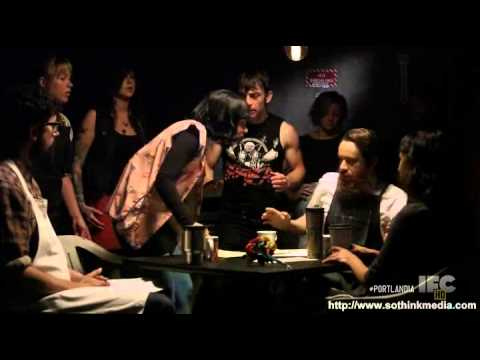

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/erbun/Documents/Lambda School/Unit4/Sprint1/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
"""
Wrangle function for cleaning and modifying the dataset to prepare for analysis
"""

def wrangle(df):
    # Strip off the extra text in each cell and cast the remaining number to a float
    df['star_rating'] = df['star_rating'].str.replace('star rating', '').astype(float)
    
    # Extract our our series to work with to split into review_text, date, and check-ins columns
    series = df['full_review_text']
    
    # Instantiate blank lists to append results to
    dates = []
    reviews = []
    checkins = []
    good_or_bad = []
    
    # Iterate through the rankings and create our good_or_bad series
    for r in df['star_rating']:
        if r >= 4:
            good_or_bad.append('good')
        else:
            good_or_bad.append('bad')
    
    # Iterate through each obseration in our series to split out the data
    for s in series:
        
        # Change all case to lowercase
        s = s.lower()
        
        # Split each string into it's tokens
        split_t = s.split()
        
        # Append the date for each observation to our dates list
        dates.append(split_t[0])
        
        # Check to see if the observation contains a number of checkins
        if split_t[2] in ['check-in', 'check-ins']:
            
            # If it does, then append the review and the number of checkins
            reviews.append(" ".join(split_t[3:]))
            checkins.append(split_t[1])
            
        else:
            
            # If it doesn't, then append the review and z checkins
            reviews.append(" ".join(split_t[1:]))
            checkins.append(0)
    
    # Add our lists to our DF to make new columsn
    df['review_text'] = reviews
    df['date'] = dates
    df['check-ins'] = checkins
    df['good_or_bad'] = good_or_bad
    
    # Change our datatypes to reflect the type of data and make all text lower case
    df['review_text'] = df['review_text'].astype(str)
    df['date'] = pd.to_datetime(df['date'])
    df['check-ins'] = df['check-ins'].astype(int)
    
    # Drop the old column that's no longer needed
    df = df.drop('full_review_text', axis=1)
    
    # Return our DF
    return df


df = wrangle(shops)
df.head()

,coffee_shop_name,star_rating,review_text,date,check-ins,good_or_bad
0,The Factory - Cafe With a Soul,5.0,love love loved the atmosphere! every corner o...,2016-11-25,1,good
1,The Factory - Cafe With a Soul,4.0,"listed in date night: austin, ambiance in aust...",2016-12-02,0,good
2,The Factory - Cafe With a Soul,4.0,listed in brunch spots i loved the eclectic an...,2016-11-30,1,good
3,The Factory - Cafe With a Soul,2.0,very cool decor! good drinks nice seating howe...,2016-11-25,0,bad
4,The Factory - Cafe With a Soul,4.0,they are located within the northcross mall sh...,2016-12-03,1,good


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [7]:
# FUNCTION: Tokenize function for tokenizing data
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choiceaa
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [8]:
df.head()

,coffee_shop_name,star_rating,review_text,date,check-ins,good_or_bad
0,The Factory - Cafe With a Soul,5.0,love love loved the atmosphere! every corner o...,2016-11-25,1,good
1,The Factory - Cafe With a Soul,4.0,"listed in date night: austin, ambiance in aust...",2016-12-02,0,good
2,The Factory - Cafe With a Soul,4.0,listed in brunch spots i loved the eclectic an...,2016-11-30,1,good
3,The Factory - Cafe With a Soul,2.0,very cool decor! good drinks nice seating howe...,2016-11-25,0,bad
4,The Factory - Cafe With a Soul,4.0,they are located within the northcross mall sh...,2016-12-03,1,good


In [9]:
df['tokens'] = df['review_text'].apply(tokenize)
df.head()

,coffee_shop_name,star_rating,review_text,date,check-ins,good_or_bad,tokens
0,The Factory - Cafe With a Soul,5.0,love love loved the atmosphere! every corner o...,2016-11-25,1,good,"[love, love, loved, the, atmosphere, every, co..."
1,The Factory - Cafe With a Soul,4.0,"listed in date night: austin, ambiance in aust...",2016-12-02,0,good,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,4.0,listed in brunch spots i loved the eclectic an...,2016-11-30,1,good,"[listed, in, brunch, spots, i, loved, the, ecl..."
3,The Factory - Cafe With a Soul,2.0,very cool decor! good drinks nice seating howe...,2016-11-25,0,bad,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,4.0,they are located within the northcross mall sh...,2016-12-03,1,good,"[they, are, located, within, the, northcross, ..."


In [10]:
# Determine word count
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [11]:
# Function for counting words
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [12]:
wc = count(df['tokens'])

In [13]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,the,6847,34809,1.0,0.045313,0.045313,0.899028
42,and,6864,26650,2.0,0.034692,0.080005,0.901261
10,a,6246,22755,3.0,0.029622,0.109627,0.820116
69,i,5528,20237,4.0,0.026344,0.135971,0.725840
70,to,5653,17164,5.0,0.022343,0.158314,0.742253


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

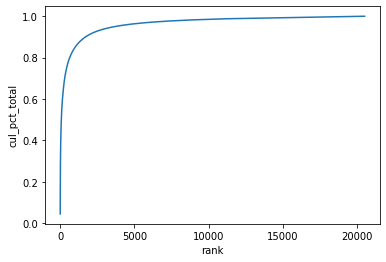

In [14]:
# Cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

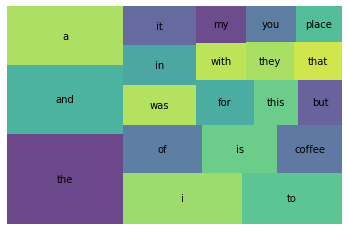

In [15]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='good_or_bad', ylabel='count'>

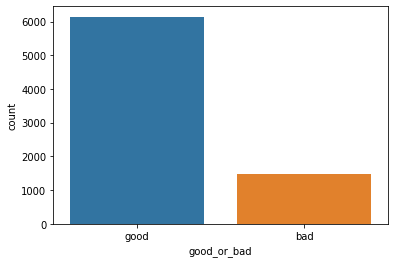

In [26]:
sns.countplot(df['good_or_bad'])

In [27]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
# Tokenizer Pipeline

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)
    
df['tokenized_tokens'] = tokens

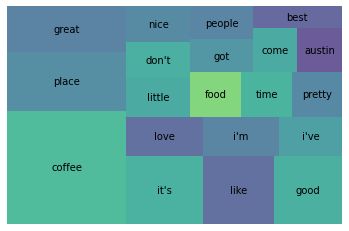

In [36]:
wc = count(df['tokenized_tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [41]:
STOP_WORDS = nlp.Defaults.stop_words.union(['place', 'coffee', "don't", "it's", "i've", '-'])

In [42]:
tokens = []

for doc in tokenizer.pipe(df['review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokenized_tokens'] = tokens

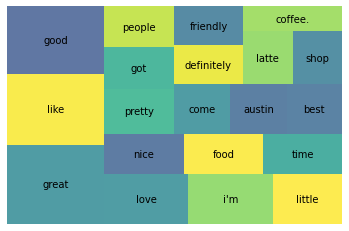

In [43]:
wc = count(df['tokenized_tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [44]:
# Functions for determining lemmas
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [45]:
df['lemmas'] = df['review_text'].apply(get_lemmas)

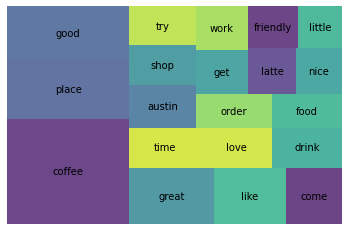

In [47]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [7]:
print('test')

test


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

